In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pickle

from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='paper')

from masterthesis.utils import CEFR_LABELS, ROUND_CEFR_LABELS, heatmap, IMG_DIR, RESULTS_DIR
from masterthesis.visualization.plot_results import plot_history, multi_task_plot_history

Using TensorFlow backend.


In [3]:
def conf_matrices(res, cmap='gnuplot2_r'):
    if res.config.get('nli', False):
        labels = []
    elif res.config.get('round_cefr', False):
        labels = ROUND_CEFR_LABELS
        x_rot = 0
    else:
        labels = CEFR_LABELS
        x_rot = 90
    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(5, 2.7)
    cm = confusion_matrix(y_pred=r.predictions, y_true=r.true)
    ax1 = sns.heatmap(cm, annot=True, square=False, cbar=False, ax=axes[0], cmap=cmap)
    ax1.set_xticklabels(labels)
    ax1.set_yticklabels(labels, rotation=0)
    ax1.set_title('Counts')

    cm = cm / cm.sum(axis=1, keepdims=True)

    ax2 = sns.heatmap(cm, annot=False, square=False, cbar=True, ax=axes[1], cmap=cmap)
    ax2.set_xticklabels(labels)
    ax2.set_yticklabels(labels, rotation=0)
    ax2.set_title('Normalized by true class')
    ax1.set_xlabel('Predicted class')
    ax1.set_ylabel('True class')
    ax2.set_xlabel('Predicted class')
    plt.tight_layout()
    plt.setp(ax1.get_xticklabels(), rotation=x_rot)
    plt.setp(ax2.get_xticklabels(), rotation=x_rot)

In [4]:
def history_plot(res):
    fig = plt.figure()
    fig.set_size_inches(5, 2.5)
    history = res.history
    is_multi = res.config.get('multi', True) and res.config.get('aux_loss_weight', 0) > 0
    if is_multi:
        multi_task_plot_history(history, fig)
    else:
        ax1, ax2 = fig.subplots(1, 2)
        plot_history(history, ax1, ax2)
    plt.tight_layout()

In [5]:
def losses_plot(res):
    history = res.history
    fig, axes = plt.subplots(1, 3)
    fig.set_size_inches(5, 2.5)
    keys = [["%sloss" % s, "val_%sloss" % s] for s in ["", "output_", "aux_output_"]]
    for keypair, ax in zip(keys, axes):
        for key in keypair:
            ax.plot(history[key], label=key)
        ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0))

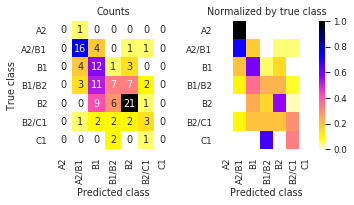

In [6]:
r = pickle.load((RESULTS_DIR / 'mlp_char-26449272_22.pkl').open('rb'))
conf_matrices(r)
#plt.savefig(str(IMG_DIR / 'mlp-char-rank.pdf'), bbox_inches='tight')

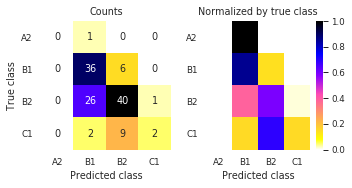

In [7]:
r = pickle.load((RESULTS_DIR / 'mlp_char-26449273_22.pkl').open('rb'))
conf_matrices(r)
#plt.savefig(str(IMG_DIR / 'mlp-char-rank-round.pdf'), bbox_inches='tight')

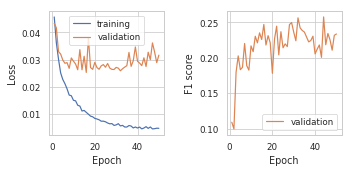

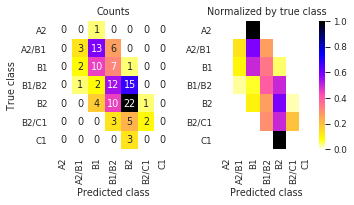

In [8]:
r = pickle.load((RESULTS_DIR / 'cnn-26515464_6.pkl').open('rb'))
history_plot(r)
#plt.savefig(str(IMG_DIR / 'cnn-training.pdf'), bbox_inches='tight')
conf_matrices(r)
#plt.savefig(str(IMG_DIR / 'cnn-confusion.pdf'), bbox_inches='tight')

/home/stig/master-thesis/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Macro F1: 0.460
Micro F1: 0.447


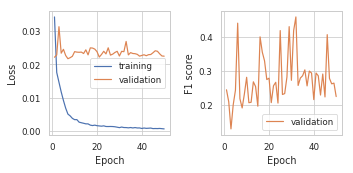

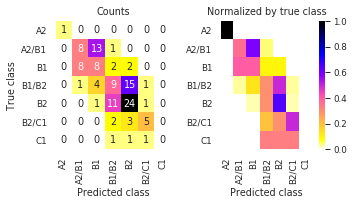

In [9]:
r = pickle.load((RESULTS_DIR / 'rnn-26536430_15.pkl').open('rb'))
print("Macro F1: %.3f\nMicro F1: %.3f"
      % (f1_score(r.true, r.predictions, average='macro'),
         f1_score(r.true, r.predictions, average='micro')))
history_plot(r)
plt.savefig(str(IMG_DIR / 'rnn-training.pdf'), bbox_inches='tight')
conf_matrices(r)
plt.savefig(str(IMG_DIR / 'rnn-confusion.pdf'), bbox_inches='tight')

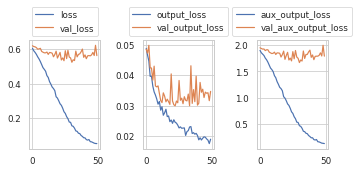

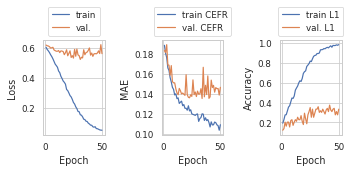

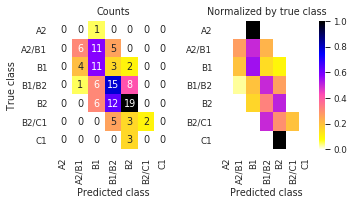

In [10]:
r = pickle.load((RESULTS_DIR / 'cnn-multi-26728430_2.pkl').open('rb'))
losses_plot(r)
plt.tight_layout()
history_plot(r)
#plt.savefig(str(IMG_DIR / 'cnn-multi-training.pdf'), bbox_inches='tight')
conf_matrices(r)
#plt.savefig(str(IMG_DIR / 'cnn-multi-confusion.pdf'), bbox_inches='tight')

0.1


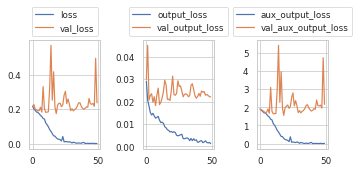

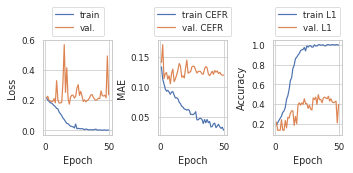

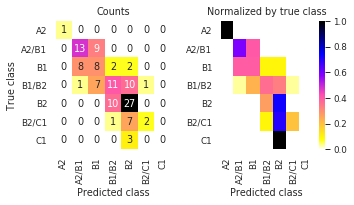

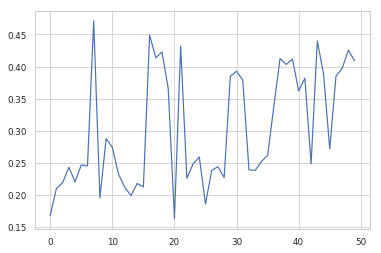

In [11]:
r = pickle.load((RESULTS_DIR / 'rnn-multi-26728427_18.pkl').open('rb'))
print(r.config['aux_loss_weight'])
losses_plot(r)
plt.tight_layout()
history_plot(r)
plt.tight_layout(h_pad=0.0, w_pad=0.0)
#plt.savefig(str(IMG_DIR / 'rnn-multi-training.pdf'), bbox_inches='tight')
conf_matrices(r)
#plt.savefig(str(IMG_DIR / 'rnn-multi-confusion.pdf'), bbox_inches='tight')
fig = plt.figure()
fig.gca().plot(r.history['val_f1'])

## Scratch below

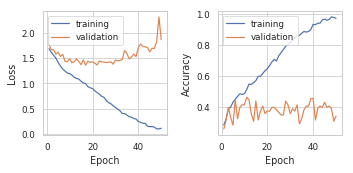

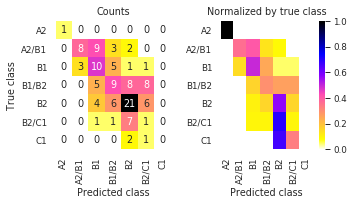

In [12]:
r = pickle.load((RESULTS_DIR / 'rnn-26287008_23.pkl').open('rb'))
history_plot(r)
#plt.savefig(str(IMG_DIR / 'rnn-training.pdf'), bbox_inches='tight')
conf_matrices(r)
#plt.savefig(str(IMG_DIR / 'rnn-confusion.pdf'), bbox_inches='tight')

In [13]:
r.config.get('multi', False) or r.config.get('aux_loss_weight', 0) > 0

True